# Moving Correlation: MLS vs ErrorToWordRatio

In this notebook, you will find **moving correlation** plots between **Mean Length of Sentence (MLS)** and **ErrorToWordRatio**, enhanced by **LOESS smoothing** and a **polynomial trendline**. 

## Specific Graphs Worth Looking At:

1. **Figure 111 - Group 1 (Arin and Engin)**:  
   This graph shows a strong negative correlation, suggesting that as sentence length increases, the error rate decreases, demonstrating improved fluency and accuracy.

2. **Figure 112 - Group 1 (Aysen and Sinem)**:  
   A similar trend is observed, with increasing MLS being linked to a reduction in ErrorToWordRatio, indicating that longer sentences correspond to fewer grammatical mistakes.

3. **Figure 116 - Group 1 (Helin and Senay)**:  
   This graph shows some variability in correlation.

4. **Figure 120 - Group 1 (Umay and Kubra)**:  
   A consistent negative correlation is observed, showing that as sentence length increases, error rates decrease significantly, marking steady improvement in both metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import detrend
import statsmodels.api as sm


# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Verifying the lists have been created
len(g1_dataframes), len(g2_dataframes)  # Should return 10 for each list

# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Verifying the lists have been created
len(g1_dataframes), len(g2_dataframes)  # Should return 10 for each list

# Function to detrend and normalize specific columns in a dataframe
def detrend_and_normalize_columns(df, columns_to_normalize):
    df_detrended = df.copy()  # Make a copy of the original dataframe to avoid modifying it directly
    
    # Loop over all columns and detrend if the column contains numeric data
    for col in df.columns:
        if col in columns_to_normalize:
            if np.issubdtype(df[col].dtype, np.number):  # Check if the column is numeric
                df_detrended[col] = detrend(df[col])
    
    # Normalize the columns to have values between 0 and 1
    scaler = MinMaxScaler()
    df_detrended[columns_to_normalize] = scaler.fit_transform(df_detrended[columns_to_normalize])
    
    return df_detrended

# Columns to detrend and normalize: MLS, CN/C, ErrorToWordRatio
columns_to_normalize = ['MLS', 'CN_C', 'ErrorToWordRatio']

# Detrend and normalize all G1 dataframes
g1_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g1_dataframes]

# Detrend and normalize all G2 dataframes
g2_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g2_dataframes]

# Assign individual detrended and normalized dataframes for G1
g1_arin_engin_df_detrended = g1_dataframes_detrended[0]
g1_aysen_sinem_df_detrended = g1_dataframes_detrended[1]
g1_cello_ezgi_df_detrended = g1_dataframes_detrended[2]
g1_dilara_sila_df_detrended = g1_dataframes_detrended[3]
g1_elanur_eceberfu_df_detrended = g1_dataframes_detrended[4]
g1_helin_senay_df_detrended = g1_dataframes_detrended[5]
g1_nupelda_eda_df_detrended = g1_dataframes_detrended[6]
g1_oyku_cahit_df_detrended = g1_dataframes_detrended[7]
g1_selin_zahide_df_detrended = g1_dataframes_detrended[8]
g1_umay_kubra_df_detrended = g1_dataframes_detrended[9]

# Assign individual detrended and normalized dataframes for G2
g2_abidin_osman_df_detrended = g2_dataframes_detrended[0]
g2_aleynaceren_df_detrended = g2_dataframes_detrended[1]
g2_ayse_halime_df_detrended = g2_dataframes_detrended[2]
g2_beyza_umur_df_detrended = g2_dataframes_detrended[3]
g2_ceren_mihriban_df_detrended = g2_dataframes_detrended[4]
g2_damla_sumeyye_df_detrended = g2_dataframes_detrended[5]
g2_fadime_sura_df_detrended = g2_dataframes_detrended[6]
g2_fatma_eren_df_detrended = g2_dataframes_detrended[7]
g2_songul_esma_df_detrended = g2_dataframes_detrended[8]
g2_zeynep_elif_df_detrended = g2_dataframes_detrended[9]

# Verify detrended and normalized dataframes are created
len(g1_dataframes_detrended), len(g2_dataframes_detrended)  # Should return 10 for each list


(10, 10)

Figure 111. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for Group 2 - Abidin and Osman


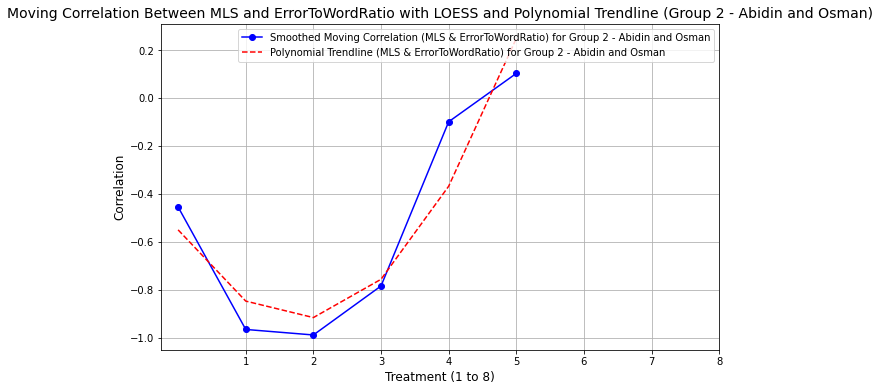

Figure 112. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for Group 2 - Aleyna and Ceren


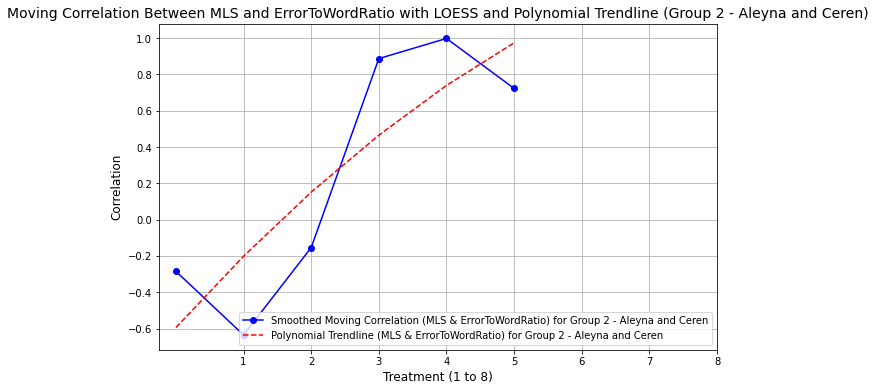

Figure 113. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for Group 2 - Ayse and Halime


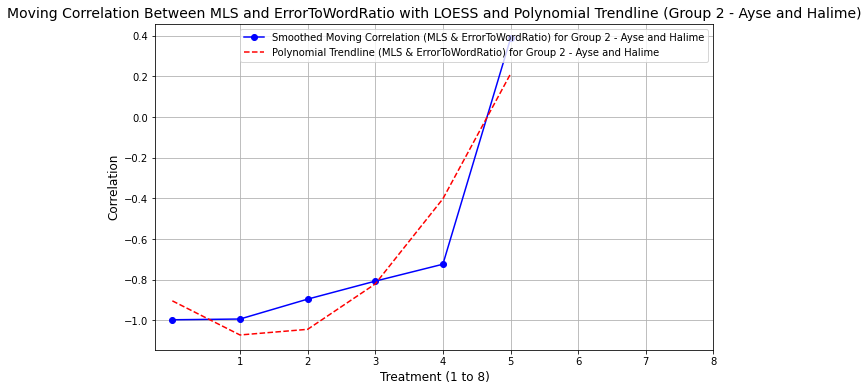

Figure 114. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for Group 2 - Beyza and Umur


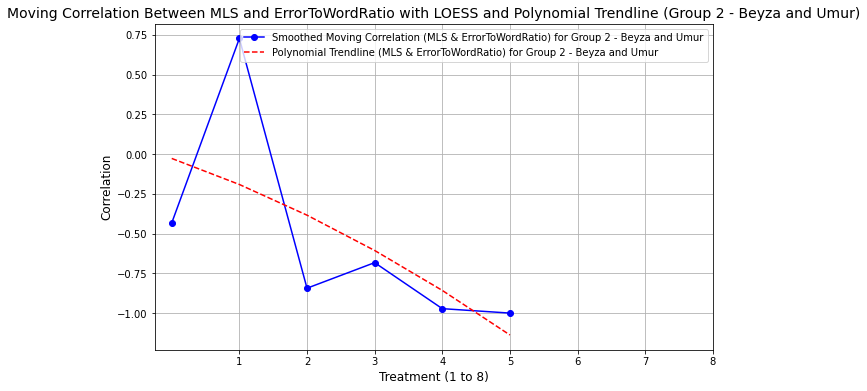

Figure 115. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for Group 2 - Ceren and Mihriban


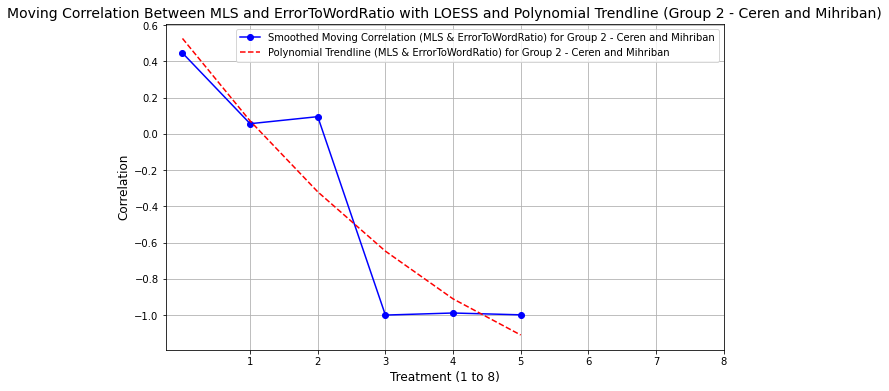

Figure 116. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for Group 2 - Damla and Sumeyye


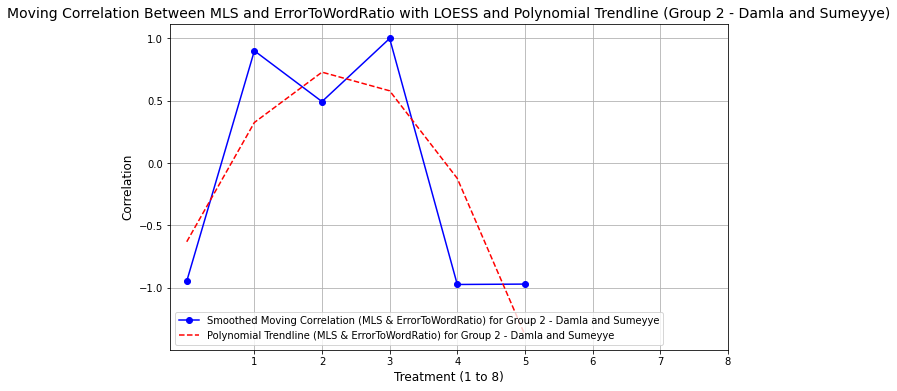

Figure 117. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for Group 2 - Fadime and Sura


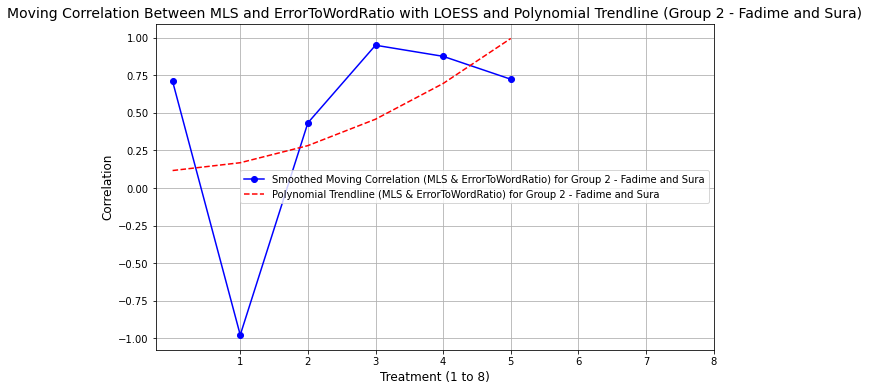

Figure 118. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for Group 2 - Fatma and Eren


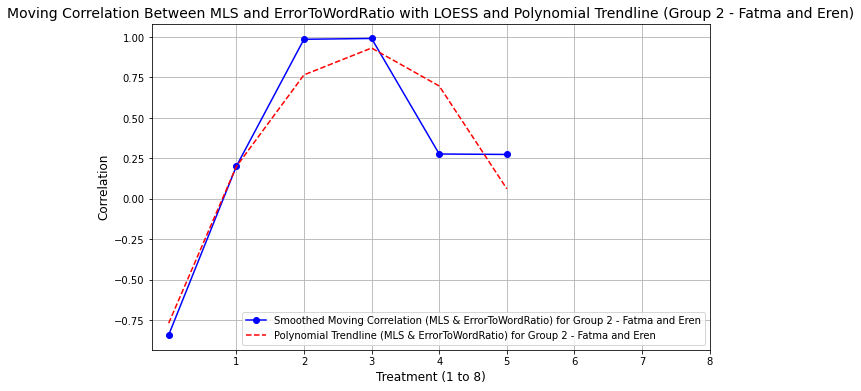

Figure 119. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for Group 2 - Songul and Esma


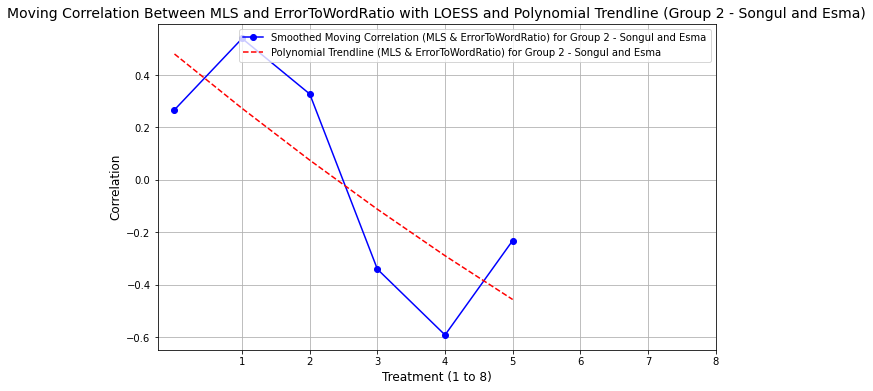

Figure 120. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for Group 2 - Zeynep and Elif


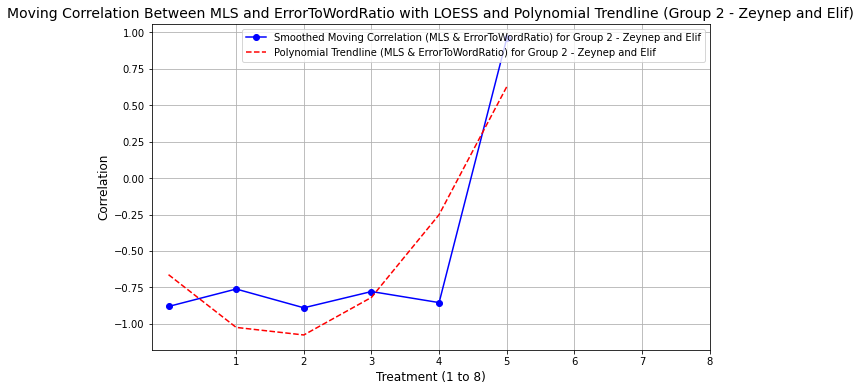

In [2]:
# Updated list of G1 peer group names for better display
g2_names_display = [
    'Group 2 - Abidin and Osman', 'Group 2 - Aleyna and Ceren', 'Group 2 - Ayse and Halime',
    'Group 2 - Beyza and Umur', 'Group 2 - Ceren and Mihriban', 'Group 2 - Damla and Sumeyye',
    'Group 2 - Fadime and Sura', 'Group 2 - Fatma and Eren', 'Group 2 - Songul and Esma', 
    'Group 2 - Zeynep and Elif'
]


# Function to calculate moving correlation between MLS and ErrorToWordRatio
def moving_correlation(df, window_size):
    # Calculate the rolling correlation between MLS and ErrorToWordRatio using the specified window size
    rolling_corr = df['MLS'].rolling(window=window_size).corr(df['ErrorToWordRatio'])
    return rolling_corr

# Function to apply LOESS smoothing to the moving correlation
def loess_smooth(x, y, frac=0.3):
    lowess = sm.nonparametric.lowess(y, x, frac=frac)
    return lowess[:, 1]

# Function to fit a polynomial trendline (degree can be adjusted)
def polynomial_trendline(x, y, degree=2):
    coeffs = np.polyfit(x, y, degree)
    poly_eq = np.poly1d(coeffs)
    return poly_eq(x)

# Define window size (e.g., 3 treatments)
window_size = 3

# Starting figure number from 111
figure_number = 111

# Loop through all detrended G1 dataframes and compute moving correlation for MLS and ErrorToWordRatio
for df_detrended, name_display in zip(g2_dataframes_detrended, g2_names_display):
    print(f"Figure {figure_number}. Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline for {name_display}")
    figure_number += 1
    
    plt.figure(figsize=(10, 6))
    
    # Create the x-axis values representing treatments from 1 to 8
    treatments = range(1, 9)
    
    # Calculate moving correlation between MLS and ErrorToWordRatio
    rolling_corr = moving_correlation(df_detrended, window_size)
    
    # Drop NaN values from rolling correlation
    rolling_corr = rolling_corr.dropna()
    
    # Adjust treatments to match the length of the valid rolling correlations
    valid_treatments = range(len(rolling_corr))  # Ensure the valid treatments are continuous and match the correlation length
    
    # Apply LOESS smoothing to the moving correlation
    smoothed_corr = loess_smooth(valid_treatments, rolling_corr, frac=0.3)
    
    # Fit a polynomial trendline to the moving correlation
    poly_trend = polynomial_trendline(valid_treatments, rolling_corr, degree=2)  # Degree 2 polynomial (quadratic)
    
    # Plot the LOESS smoothed moving correlation
    plt.plot(valid_treatments, smoothed_corr, marker='o', linestyle='-', color='b', label=f'Smoothed Moving Correlation (MLS & ErrorToWordRatio) for {name_display}')
    
    # Plot the polynomial trendline
    plt.plot(valid_treatments, poly_trend, linestyle='--', color='r', label=f'Polynomial Trendline (MLS & ErrorToWordRatio) for {name_display}')
    
    # Add labels and title
    plt.title(f'Moving Correlation Between MLS and ErrorToWordRatio with LOESS and Polynomial Trendline ({name_display})', fontsize=14)
    plt.xlabel('Treatment (1 to 8)', fontsize=12)
    plt.ylabel('Correlation', fontsize=12)
    
    # Set x-axis limits to reflect 1 to 8 treatments
    plt.xticks(treatments)
    
    # Show the legend and grid
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()
